# Data Exploration of Deaths in US Cities

## TABLE III. Deaths in 122 U.S. cities 
(https://catalog.data.gov/dataset/table-iii-deaths-in-122-u-s-cities)

TABLE III. Deaths in 122 U.S. cities â 2016. 122 Cities Mortality Reporting System â Each week, the vital statistics offices of 122 cities across the United States report the total number of death certificates processed and the number of those for which pneumonia or influenza was listed as the underlying or contributing cause of death by age group (Under 28 days, 28 days â1 year, 1-14 years, 15-24 years, 25-44 years, 45-64 years, 65-74 years, 75-84 years, and â¥ 85 years). FOOTNOTE: U: Unavailable. â: No reported cases. * Mortality data in this table are voluntarily reported from 122 cities in the United States, most of which have populations of 100,000 or more. A death is reported by the place of its occurrence and by the week that the death certificate was filed. Fetal deaths are not included. â  Pneumonia and influenza. Â§ Total includes unknown ages.

In [107]:
from __future__ import print_function, division
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

# various options in pandas
pd.set_option('display.max_columns', None) #does not print every single column, would be tedious
pd.set_option('display.max_rows', 25) #how many rows, it truncates
pd.set_option('display.precision', 3) #how many digits to print

In [2]:
df = pd.read_csv('Deaths_122_US_Cities.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 19 columns):
Reporting Area                                  5148 non-null object
MMWR YEAR                                       5148 non-null int64
MMWR WEEK                                       5148 non-null int64
All causes, by age (years), All Ages**          4830 non-null float64
All causes, by age (years), All Ages**, flag    318 non-null object
All causes, by age (years), ≥65                 4824 non-null float64
All causes, by age (years), ≥65, flag           324 non-null object
All causes, by age (years), 45–64               4778 non-null float64
All causes, by age (years), 45–64, flag         370 non-null object
All causes, by age (years), 25–44               4358 non-null float64
All causes, by age (years), 25–44, flag         790 non-null object
All causes, by age (years), 1–24                3301 non-null float64
All causes, by age (years), 1–24, flag          1847 non-null obje

In [7]:
df.columns

Index([u'Reporting Area', u'MMWR YEAR', u'MMWR WEEK',
       u'All causes, by age (years), All Ages**',
       u'All causes, by age (years), All Ages**, flag',
       u'All causes, by age (years), ≥65',
       u'All causes, by age (years), ≥65, flag',
       u'All causes, by age (years), 45–64',
       u'All causes, by age (years), 45–64, flag',
       u'All causes, by age (years), 25–44',
       u'All causes, by age (years), 25–44, flag',
       u'All causes, by age (years), 1–24',
       u'All causes, by age (years), 1–24, flag',
       u'All causes, by age (years), LT 1',
       u'All causes, by age (years), LT 1, flag', u'P&I† Total',
       u'P&I† Total, flag', u'Location 1', u'Location 2'],
      dtype='object')

In [33]:
df.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), ≥65","All causes, by age (years), ≥65, flag","All causes, by age (years), 45–64","All causes, by age (years), 45–64, flag","All causes, by age (years), 25–44","All causes, by age (years), 25–44, flag","All causes, by age (years), 1–24","All causes, by age (years), 1–24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I† Total,"P&I† Total, flag",Location 1,Location 2
0,New England,2016,1,600.0,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN,NaN
1,Mid. Atlantic,2016,1,807.0,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN,NaN
2,E.N. Central,2016,1,2468.0,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN,NaN
3,W.N. Central,2016,1,634.0,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN,NaN
4,S. Atlantic,2016,1,1402.0,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN,NaN


## Data Cleaning
The dataset
 
The dataset that was evaluated included 122 cities across the US reporting the total number of deaths as well as the number of deaths caused by pneumonia or influenza. The dataset was organized by groups, including: all ages, over65, between 45 to 64, between 24 to 44, between 1 to 24, and under 1 years old. There was a separate column for the total number of deaths caused by pneumonia or influenza. Finally, each death included location data along with the week in the year 2016.


In [54]:
df['P&I† Total, flag'].unique() #the 'flag' columns are droppable

array([nan, 'U', '-'], dtype=object)

In [55]:
df['All causes, by age (years), All Ages**, flag'].unique()

array([nan, 'U', '-'], dtype=object)

In [56]:
df['Location 2'].unique()

array([ nan])

In [66]:
df_cleaned = df[['Reporting Area', 'MMWR YEAR', 'MMWR WEEK', 'All causes, by age (years), All Ages**', 'All causes, by age (years), ≥65', 
           'All causes, by age (years), 45–64', 'All causes, by age (years), 25–44', 'All causes, by age (years), 1–24',
           'All causes, by age (years), LT 1', 'P&I† Total', 'Location 1']]
df_cleaned.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), ≥65","All causes, by age (years), 45–64","All causes, by age (years), 25–44","All causes, by age (years), 1–24","All causes, by age (years), LT 1",P&I† Total,Location 1
0,New England,2016,1,600.0,426.0,125.0,28.0,12.0,9.0,47.0,NaN
1,Mid. Atlantic,2016,1,807.0,563.0,181.0,32.0,13.0,18.0,32.0,NaN
2,E.N. Central,2016,1,2468.0,1611.0,594.0,167.0,62.0,34.0,159.0,NaN
3,W.N. Central,2016,1,634.0,432.0,150.0,31.0,9.0,11.0,37.0,NaN
4,S. Atlantic,2016,1,1402.0,893.0,343.0,92.0,32.0,41.0,88.0,NaN


In [74]:
df_cleaned.columns = ['reporting_area', 'year', 'week', 'all_ages', 'over65', '45-64', '25-44', '1-24', 'LT_1', 'pneumonia_influenza', 'location']
df_cleaned.head(15)
#the first 9 rows are regions, the 10th row is an aggregate of these regions, and then from row 11 onwards the
#reporting area matches the location name with it's coordinates

,reporting_area,year,week,all_ages,over65,45-64,25-44,1-24,LT_1,pneumonia_influenza,location
0,New England,2016,1,600.0,426.0,125.0,28.0,12.0,9.0,47.0,NaN
1,Mid. Atlantic,2016,1,807.0,563.0,181.0,32.0,13.0,18.0,32.0,NaN
2,E.N. Central,2016,1,2468.0,1611.0,594.0,167.0,62.0,34.0,159.0,NaN
3,W.N. Central,2016,1,634.0,432.0,150.0,31.0,9.0,11.0,37.0,NaN
4,S. Atlantic,2016,1,1402.0,893.0,343.0,92.0,32.0,41.0,88.0,NaN
5,E.S. Central,2016,1,1230.0,790.0,296.0,97.0,22.0,25.0,76.0,NaN
6,W.S. Central,2016,1,2167.0,1408.0,542.0,148.0,40.0,29.0,124.0,NaN
7,Mountain,2016,1,1460.0,997.0,316.0,103.0,26.0,18.0,95.0,NaN
8,Pacific,2016,1,2021.0,1480.0,401.0,99.0,26.0,15.0,156.0,NaN
9,Total¶,2016,1,12789.0,8600.0,2948.0,797.0,242.0,200.0,814.0,NaN


In [79]:
print(df_cleaned['reporting_area'].nunique())
print(df_cleaned['location'].nunique())
#this makes sense, given that the first few rows are regional

133
124


In [77]:
df_cleaned.iloc[100:110,:] #sanity check, to see that reporting area and location matches!
#notice that all_ages always the sum

,reporting_area,year,week,all_ages,over65,45-64,25-44,1-24,LT_1,pneumonia_influenza,location
100,"Cincinnati, OH",2016,1,96.0,58.0,30.0,5.0,2.0,1.0,3.0,"Cincinnati, OH\n(39.104427, -84.513808)"
101,"San Francisco, CA",2016,1,143.0,103.0,33.0,6.0,NaN,1.0,10.0,"San Francisco, CA\n(37.78008, -122.420168)"
102,"Canton, OH",2016,1,29.0,23.0,4.0,2.0,NaN,NaN,3.0,"Canton, OH\n(39.945208, -75.118833)"
103,"Buffalo, NY",2016,1,87.0,51.0,23.0,7.0,3.0,3.0,2.0,"Buffalo, NY\n(39.945422, -78.64671)"
104,"Berkeley, CA",2016,1,19.0,18.0,1.0,NaN,NaN,NaN,4.0,"Berkeley, CA\n(40.692529, -73.990996)"
105,"Boise, ID",2016,1,85.0,66.0,15.0,3.0,NaN,1.0,5.0,"Boise, ID\n(43.597772, -83.884521)"
106,"Boston, MA",2016,1,170.0,110.0,44.0,8.0,6.0,2.0,12.0,"Boston, MA\n(42.358894, -71.056742)"
107,"Pasadena, CA",2016,1,30.0,22.0,6.0,1.0,NaN,1.0,2.0,"Pasadena, CA\n(34.14955, -118.141452)"
108,"Norfolk, VA",2016,1,42.0,34.0,6.0,NaN,2.0,NaN,5.0,"Norfolk, VA\n(36.846164, -76.285913)"
109,"El Paso, TX",2016,1,140.0,101.0,27.0,11.0,NaN,1.0,1.0,"El Paso, TX\n(31.76006, -106.492257)"


In [91]:
df_cleaned.iloc[0:10,:]

,reporting_area,year,week,all_ages,over65,45-64,25-44,1-24,LT_1,pneumonia_influenza,location
0,New England,2016,1,600.0,426.0,125.0,28.0,12.0,9.0,47.0,NaN
1,Mid. Atlantic,2016,1,807.0,563.0,181.0,32.0,13.0,18.0,32.0,NaN
2,E.N. Central,2016,1,2468.0,1611.0,594.0,167.0,62.0,34.0,159.0,NaN
3,W.N. Central,2016,1,634.0,432.0,150.0,31.0,9.0,11.0,37.0,NaN
4,S. Atlantic,2016,1,1402.0,893.0,343.0,92.0,32.0,41.0,88.0,NaN
5,E.S. Central,2016,1,1230.0,790.0,296.0,97.0,22.0,25.0,76.0,NaN
6,W.S. Central,2016,1,2167.0,1408.0,542.0,148.0,40.0,29.0,124.0,NaN
7,Mountain,2016,1,1460.0,997.0,316.0,103.0,26.0,18.0,95.0,NaN
8,Pacific,2016,1,2021.0,1480.0,401.0,99.0,26.0,15.0,156.0,NaN
9,Total¶,2016,1,12789.0,8600.0,2948.0,797.0,242.0,200.0,814.0,NaN


## Deaths by week
Total Number of Deaths per Week in 2016
In the graph below, it shows that a larger portion of deaths occur in the earlier part of the calendar year, and so we can conclude that there is a seasonal correlation between total number of reported deaths. This could be because of things like weather (less deaths when the weather is more medial), where we can see in the graph that the total number of deaths begin to decline on average around week 20. It’s worth noting that the dataset included only from weeks 1-39 in the 2016 calendar year. 


In [95]:
df_total = df_cleaned[df_cleaned['reporting_area'] == 'Total¶'].reset_index(drop=True)
df_total

,reporting_area,year,week,all_ages,over65,45-64,25-44,1-24,LT_1,pneumonia_influenza,location
0,Total¶,2016,1,12789.0,8600.0,2948.0,797.0,242.0,200.0,814.0,NaN
1,Total¶,2016,2,11708.0,8026.0,2656.0,645.0,191.0,186.0,885.0,NaN
2,Total¶,2016,3,12150.0,8394.0,2706.0,651.0,213.0,165.0,826.0,NaN
3,Total¶,2016,4,12546.0,8503.0,2868.0,711.0,242.0,221.0,850.0,NaN
4,Total¶,2016,5,12880.0,8816.0,2878.0,740.0,260.0,185.0,804.0,NaN
5,Total¶,2016,6,12575.0,8463.0,2885.0,771.0,256.0,197.0,868.0,NaN
6,Total¶,2016,7,11718.0,7969.0,2682.0,664.0,228.0,173.0,828.0,NaN
7,Total¶,2016,8,12618.0,8602.0,2834.0,744.0,249.0,187.0,934.0,NaN
8,Total¶,2016,9,12482.0,8481.0,2829.0,743.0,239.0,186.0,874.0,NaN
9,Total¶,2016,10,12883.0,8716.0,2963.0,743.0,248.0,213.0,896.0,NaN


In [105]:
df_total = df_total.sort(columns = ['week']) #it was out of order

/Users/philliptan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


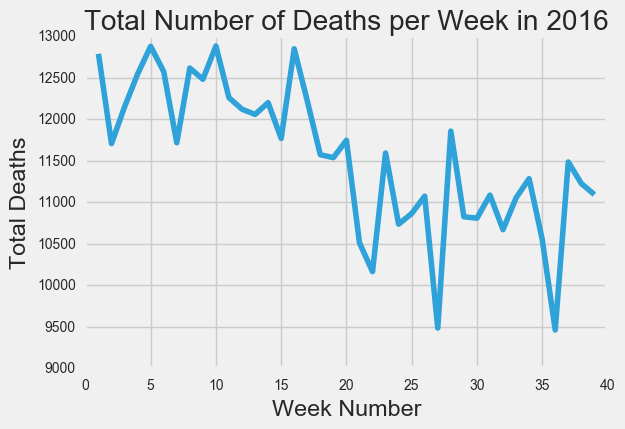

In [281]:
plt.plot(df_total['week'], df_total['all_ages'])
plt.title('Total Number of Deaths per Week in 2016')
plt.xlabel('Week Number')
plt.ylabel('Total Deaths')

## Deaths by State
Total Deaths by State
It makes sense that the states with a higher population would yield a greater number of total deaths. The states with the four highest populations in order are: California, Texas,  New York, and Florida. This holds true for the great state of California, but interestingly enough the rest of the order does not maintain the correlation. The state of Massachusetts has a smaller population that NYC, but comes in second. Texas is not second, and rather states like Ohio come before it. Finally, Florida comes in 8th even with the fourth highest state population.

In [116]:
df_byState = df_cleaned[(df_cleaned['reporting_area'] != 'Total¶') & 
                       (df_cleaned['reporting_area'] != 'New England') & 
                       (df_cleaned['reporting_area'] != 'Mid. Atlantic') & 
                       (df_cleaned['reporting_area'] != 'E.N. Central') & 
                       (df_cleaned['reporting_area'] != 'W.N. Central') & 
                        (df_cleaned['reporting_area'] != 'S. Atlantic') &
                        (df_cleaned['reporting_area'] != 'E.S. Central') & 
                        (df_cleaned['reporting_area'] != 'W.S. Central') & 
                       (df_cleaned['reporting_area'] != 'Mountain') &
                       (df_cleaned['reporting_area'] != 'Pacific')].reset_index(drop=True)
df_byState #I'm calling this byState because I want to find out the total deaths per State

,reporting_area,year,week,all_ages,over65,45-64,25-44,1-24,LT_1,pneumonia_influenza,location
0,"St. Petersburg, FL",2016,1,86.0,62.0,15.0,4.0,3.0,2.0,5.0,"St. Petersburg, FL\n(27.772069, -82.638488)"
1,"Nashville, TN",2016,1,227.0,143.0,57.0,21.0,5.0,1.0,7.0,"Nashville, TN\n(36.166687, -86.779932)"
2,"Washington, D.C.",2016,1,111.0,62.0,35.0,9.0,NaN,5.0,12.0,"Washington, D.C.\n(38.892062, -77.019912)"
3,"Kansas City, MO",2016,1,59.0,31.0,17.0,7.0,2.0,1.0,3.0,"Kansas City, MO\n(39.099792, -94.578559)"
4,"Sacramento, CA",2016,1,300.0,203.0,64.0,25.0,5.0,3.0,21.0,"Sacramento, CA\n(38.582087, -121.50012)"
5,"Honolulu, HI",2016,1,56.0,43.0,7.0,6.0,NaN,NaN,5.0,"Honolulu, HI\n(21.30992, -157.858158)"
6,"New York City, NY",2016,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York City, NY\n(40.123164, -75.333718)"
7,"Paterson, NJ",2016,1,21.0,12.0,5.0,1.0,1.0,2.0,NaN,"Paterson, NJ\n(40.916612, -74.172191)"
8,"Gary, IN",2016,1,24.0,14.0,7.0,2.0,1.0,NaN,NaN,"Gary, IN\n(42.375508, -87.924192)"
9,"Baltimore, MD",2016,1,228.0,126.0,63.0,18.0,8.0,12.0,14.0,"Baltimore, MD\n(39.290443, -76.612333)"


In [152]:
states = df_byState['reporting_area'].apply(lambda x: x.split(","))
states.head()

0    [St. Petersburg,  FL]
1         [Nashville,  TN]
2      [Washington,  D.C.]
3       [Kansas City,  MO]
4        [Sacramento,  CA]
Name: reporting_area, dtype: object

In [165]:
states_list = [] #store each parsed state from the split function
for state in states:
    states_list.append(state[1])
states_array = np.asarray(states_list) #convert this list to a numpy array so I can append to dataframe

In [249]:
df_byState['State'] = states_array

In [250]:
df_byState.head() #now that I have each state for each row, I can do a groupby each state

,reporting_area,year,week,all_ages,over65,45-64,25-44,1-24,LT_1,pneumonia_influenza,location,State
0,"St. Petersburg, FL",2016,1,86.0,62.0,15.0,4.0,3.0,2.0,5.0,"St. Petersburg, FL\n(27.772069, -82.638488)",FL
1,"Nashville, TN",2016,1,227.0,143.0,57.0,21.0,5.0,1.0,7.0,"Nashville, TN\n(36.166687, -86.779932)",TN
2,"Washington, D.C.",2016,1,111.0,62.0,35.0,9.0,NaN,5.0,12.0,"Washington, D.C.\n(38.892062, -77.019912)",D.C.
3,"Kansas City, MO",2016,1,59.0,31.0,17.0,7.0,2.0,1.0,3.0,"Kansas City, MO\n(39.099792, -94.578559)",MO
4,"Sacramento, CA",2016,1,300.0,203.0,64.0,25.0,5.0,3.0,21.0,"Sacramento, CA\n(38.582087, -121.50012)",CA


In [251]:
groupby_State = df_byState.groupby(df_byState['State']).all_ages.count() #aggregate all the deaths for each state
deaths_byState = pd.DataFrame(groupby_State).reset_index()
deaths_byState

,State,all_ages
0,AL,117
1,AR,39
2,AZ,74
3,CA,424
4,CO,115
5,CT,135
6,D.C.,28
7,DE,39
8,FL,156
9,GA,77


In [252]:
deaths_byState = deaths_byState[deaths_byState['State'] != 'PA§'] #there was an error naming the states

In [253]:
deaths_byState = deaths_byState.sort(columns='all_ages').reset_index()
deaths_byState['index'] = range(len(deaths_byState['State']))

deaths_byState #get rid of first row, typo

/Users/philliptan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,State,all_ages
0,0,PA§,0
1,1,IA,0
2,2,D.C.,28
3,3,NM,37
4,4,OR,37
5,5,NV,38
6,6,MD,38
7,7,OK,38
8,8,RI,38
9,9,KY,39


In [255]:
deaths_byState = deaths_byState.iloc[1:,:] #ignore the typo
deaths_byState

,index,State,all_ages
1,1,IA,0
2,2,D.C.,28
3,3,NM,37
4,4,OR,37
5,5,NV,38
6,6,MD,38
7,7,OK,38
8,8,RI,38
9,9,KY,39
10,10,WI,39


In [259]:
my_xticks

[' IA',
 ' D.C.',
 ' NM',
 ' OR',
 ' NV',
 ' MD',
 ' OK',
 ' RI',
 ' KY',
 ' WI',
 ' DE',
 ' AR',
 ' HI',
 ' ID',
 ' NE',
 ' NC',
 ' AZ',
 ' UT',
 ' GA',
 ' KS',
 ' VA',
 ' MO',
 ' WA',
 ' IL',
 ' CO',
 ' MI',
 ' MN',
 ' LA',
 ' AL',
 ' CT',
 ' TN',
 ' PA',
 ' FL',
 ' IN',
 ' NJ',
 ' TX',
 ' OH',
 ' NY',
 ' MA',
 ' CA']

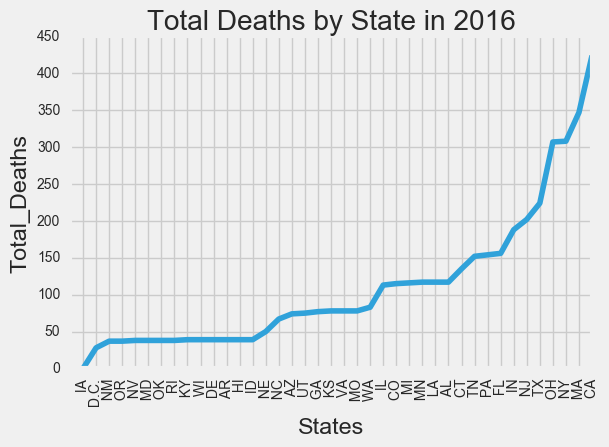

In [280]:
x = deaths_byState['index'].tolist()
y = deaths_byState['all_ages']
plt.plot(x, y)
plt.title('Total Deaths by State in 2016')
plt.xlabel('States')
plt.ylabel('Total_Deaths')
my_xticks = deaths_byState['State'].tolist()
plt.xticks(x, my_xticks, rotation='vertical');
#as a sanity check, it makes sense that California would be the highest deaths because it has the highest population!
#New York is close, but interestingly Massachussetts is second and Ohio is third.

## Deaths by Age Group
Total Deaths by Age Group
 
Intuitively, it makes sense that a larger number of total deaths would come from the older age groups. In the graph below, it’s evident that the rate of change increases as we progress towards older age groups. 


In [264]:
#could also look at graphing each group's deaths
df_byAgeGroup = df_byState[['over65', '45-64', '25-44', '1-24', 'LT_1']]
df_byAgeGroup.head()
#SIMPLE GRAPH of EACH AGE GROUP COUNTS

,over65,45-64,25-44,1-24,LT_1
0,62.0,15.0,4.0,3.0,2.0
1,143.0,57.0,21.0,5.0,1.0
2,62.0,35.0,9.0,NaN,5.0
3,31.0,17.0,7.0,2.0,1.0
4,203.0,64.0,25.0,5.0,3.0


In [274]:
AgeGroup_list = []
for age_group in df_byAgeGroup.columns:
    AgeGroup_list.append(df_byAgeGroup[str(age_group)].sum())
np.array(AgeGroup_list)

array([ 301786.,  103689.,   28358.,    9297.,    7198.])

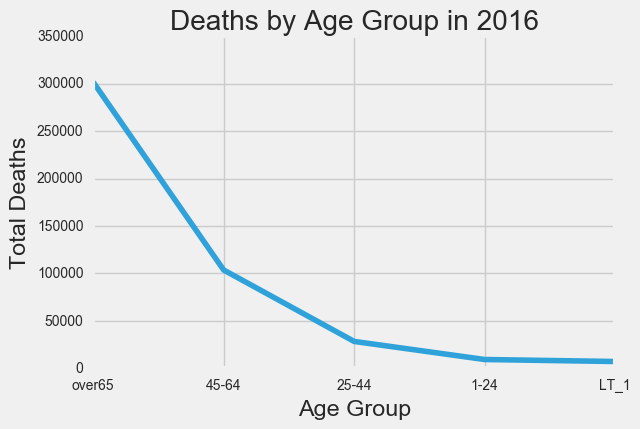

In [279]:
plt.plot(range(5), AgeGroup_list)
plt.title('Deaths by Age Group in 2016')
plt.xlabel('Age Group')
plt.ylabel('Total Deaths')
plt.xticks(range(5), df_byAgeGroup.columns);
#as a sanity check, this makes sense that there is a correlation between age and death

## Percentage of Pneumonia/Influenza Deaths 
Pneumonia/Influenza Rates compared to Age Groups
 
In a study done by the American Lung Association, it found that only pneumonia and influenza were only responsible for less than 3% of deaths in people under 45 years old. The vast majority of these types of deaths come from the senior population (over 65 years old). 
The graph compares the senior population with the young population (ages 1-24) with respect to the percentage of pneumonia/influenza deaths over the total number of deaths. 
The point of comparison was to look at the number of deaths in these three metrics that fall within one or two standard deviations above their respective means. 
The idea behind this was to see whether or not this dataset matched the findings by the American Lung Association. My finding reflects the notion that there is a strong correlation between the senior population and the number of pneumonia/influenza deaths by percentage. 


In [ ]:
#In a study done by the American Lung Association, it was found that only 3% of pneumonia/influenza deaths were from 
#people below the age of 45. The majority are well-over 65, with some between 45-64

In [265]:
#could look at percentage of pneumonia deaths over total deaths,
df_PI = df_byState[['all_ages', 'over65', '45-64', 'pneumonia_influenza']]
df_PI.head()
#TRY TO PROVE COORELATION BETWEEN HIGH % OF SENIOR AGE GROUPS AND PNEUMONIA

,all_ages,over65,45-64,pneumonia_influenza
0,86.0,62.0,15.0,5.0
1,227.0,143.0,57.0,7.0
2,111.0,62.0,35.0,12.0
3,59.0,31.0,17.0,3.0
4,300.0,203.0,64.0,21.0


In [282]:
df_PI['P&I / all_ages'] = df_PI['pneumonia_influenza'] / df_PI['all_ages']
df_PI.head()

/Users/philliptan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,all_ages,over65,45-64,pneumonia_influenza,P&I / all_ages
0,86.0,62.0,15.0,5.0,0.058
1,227.0,143.0,57.0,7.0,0.031
2,111.0,62.0,35.0,12.0,0.108
3,59.0,31.0,17.0,3.0,0.051
4,300.0,203.0,64.0,21.0,0.070


In [287]:
df_PI['1-24'] = df_byState['1-24']
df_PI.head()

/Users/philliptan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,all_ages,over65,45-64,pneumonia_influenza,P&I / all_ages,1-24
0,86.0,62.0,15.0,5.0,0.058,3.0
1,227.0,143.0,57.0,7.0,0.031,5.0
2,111.0,62.0,35.0,12.0,0.108,NaN
3,59.0,31.0,17.0,3.0,0.051,2.0
4,300.0,203.0,64.0,21.0,0.070,5.0


In [337]:
df_PI.fillna(value=0)

,all_ages,over65,45-64,pneumonia_influenza,P&I / all_ages,1-24
0,86.0,62.0,15.0,5.0,0.058,3.0
1,227.0,143.0,57.0,7.0,0.031,5.0
2,111.0,62.0,35.0,12.0,0.108,0.0
3,59.0,31.0,17.0,3.0,0.051,2.0
4,300.0,203.0,64.0,21.0,0.070,5.0
5,56.0,43.0,7.0,5.0,0.089,0.0
6,0.0,0.0,0.0,0.0,0.000,0.0
7,21.0,12.0,5.0,0.0,0.000,1.0
8,24.0,14.0,7.0,0.0,0.000,1.0
9,228.0,126.0,63.0,14.0,0.061,8.0


In [338]:
df_PI['P&I / all_ages'].describe()

count    3909.000
mean        0.073
std         0.041
min         0.004
25%           NaN
50%           NaN
75%           NaN
max         0.447
Name: P&I / all_ages, dtype: float64

In [339]:
df_PI['all_ages'].describe()

count    4440.000
mean      101.474
std       116.881
min         1.000
25%           NaN
50%           NaN
75%           NaN
max      1261.000
Name: all_ages, dtype: float64

In [340]:
df_PI['over65'].describe()

count    4434.000
mean       68.062
std        80.939
min         1.000
25%           NaN
50%           NaN
75%           NaN
max       920.000
Name: over65, dtype: float64

In [341]:
df_PI['45-64'].describe()

count    4388.000
mean       23.630
std        26.898
min         1.000
25%           NaN
50%           NaN
75%           NaN
max       273.000
Name: 45-64, dtype: float64

In [342]:
df_PI['1-24'].describe()

count    2911.000
mean        3.194
std         2.826
min         1.000
25%           NaN
50%           NaN
75%           NaN
max        23.000
Name: 1-24, dtype: float64

In [343]:
#how many people are within 1D of having a higher percentage of total deaths to pneumonia/influenza
len(df_PI[(df_PI['P&I / all_ages'] > 0.073) & (df_PI['P&I / all_ages'] < (0.073 + 0.041))]) #within 1 SD

1146

In [344]:
len(df_PI[(df_PI['P&I / all_ages'] > (0.073 + 0.041)) & (df_PI['P&I / all_ages'] < (0.073 + (2*0.041)))]) #within 2 SD

344

In [345]:
len(df_PI[(df_PI['over65'] > 68.062) & (df_PI['over65'] < (68.062 + 80.939))]) #within 1 SD of seniors

1183

In [346]:
len(df_PI[(df_PI['over65'] > (68.062 + 80.939)) & (df_PI['over65'] < (68.062 + (2*80.939)))]) #within 2 SD seniors

262

In [347]:
len(df_PI[(df_PI['1-24'] > 3.194) & (df_PI['1-24'] < (3.194 + 2.826))]) #within 1 SD of 1-24

609

In [348]:
len(df_PI[(df_PI['1-24'] > (3.194 + 2.826)) & (df_PI['1-24'] < (3.194 + (2*2.826)))]) #within 2 SD of 1-24

142

In [349]:
len(df_PI['1-24']) #sanity check

4758

In [350]:
len(df_PI[(df_PI['1-24'] < 23)]) #sanity check, how many are less than the max, this matches count. Good!!

2910

So, the correlation between the fact that most people who die from influenza/pneumonia are over 65 holds true, but it's worth noting that there are 1523 less counts of the group 1-24 than the over65 group.

In [354]:
PI = [1146, 344]
over65 = [1183, 262]
between1to24 = [609, 142]

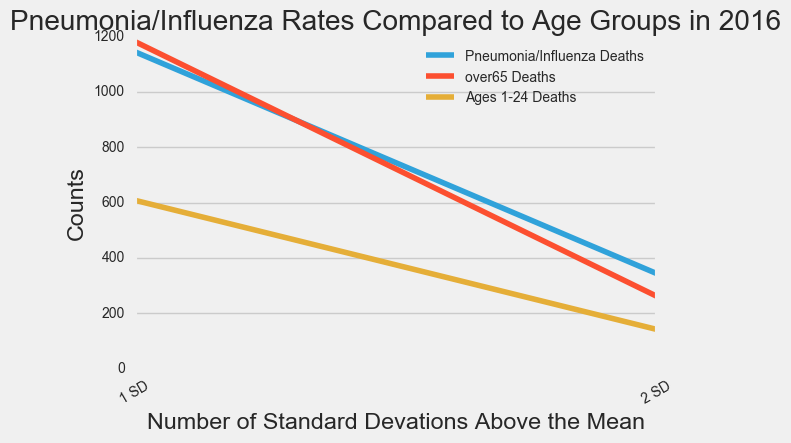

In [375]:
fig, ax = plt.subplots()

ax.plot(range(len(PI)), PI, label='Pneumonia/Influenza Deaths')
ax.plot(range(len(over65)), over65, label='over65 Deaths')
ax.plot(range(len(between1to24)), between1to24, label='Ages 1-24 Deaths')
plt.ylabel('Counts')
plt.xlabel('Number of Standard Devations Above the Mean')
plt.xticks([0,1], ['1 SD', '2 SD'], rotation='30')
plt.title('Pneumonia/Influenza Rates Compared to Age Groups in 2016')
legend = ax.legend(loc='upper right', shadow=True);

### graph analysis
In the graph above, it's showing that the total number of deaths in the age group over65 that is above 1 or 2 SD its mean is correlated to the total pneumonia/influenza deaths by percentage of all deaths that fall within 1 or 2 SD of its respective mean. As a contrast, the other age group 1-24 did not show a strong correlation. All of these insights match the findings by the American Lung Association.